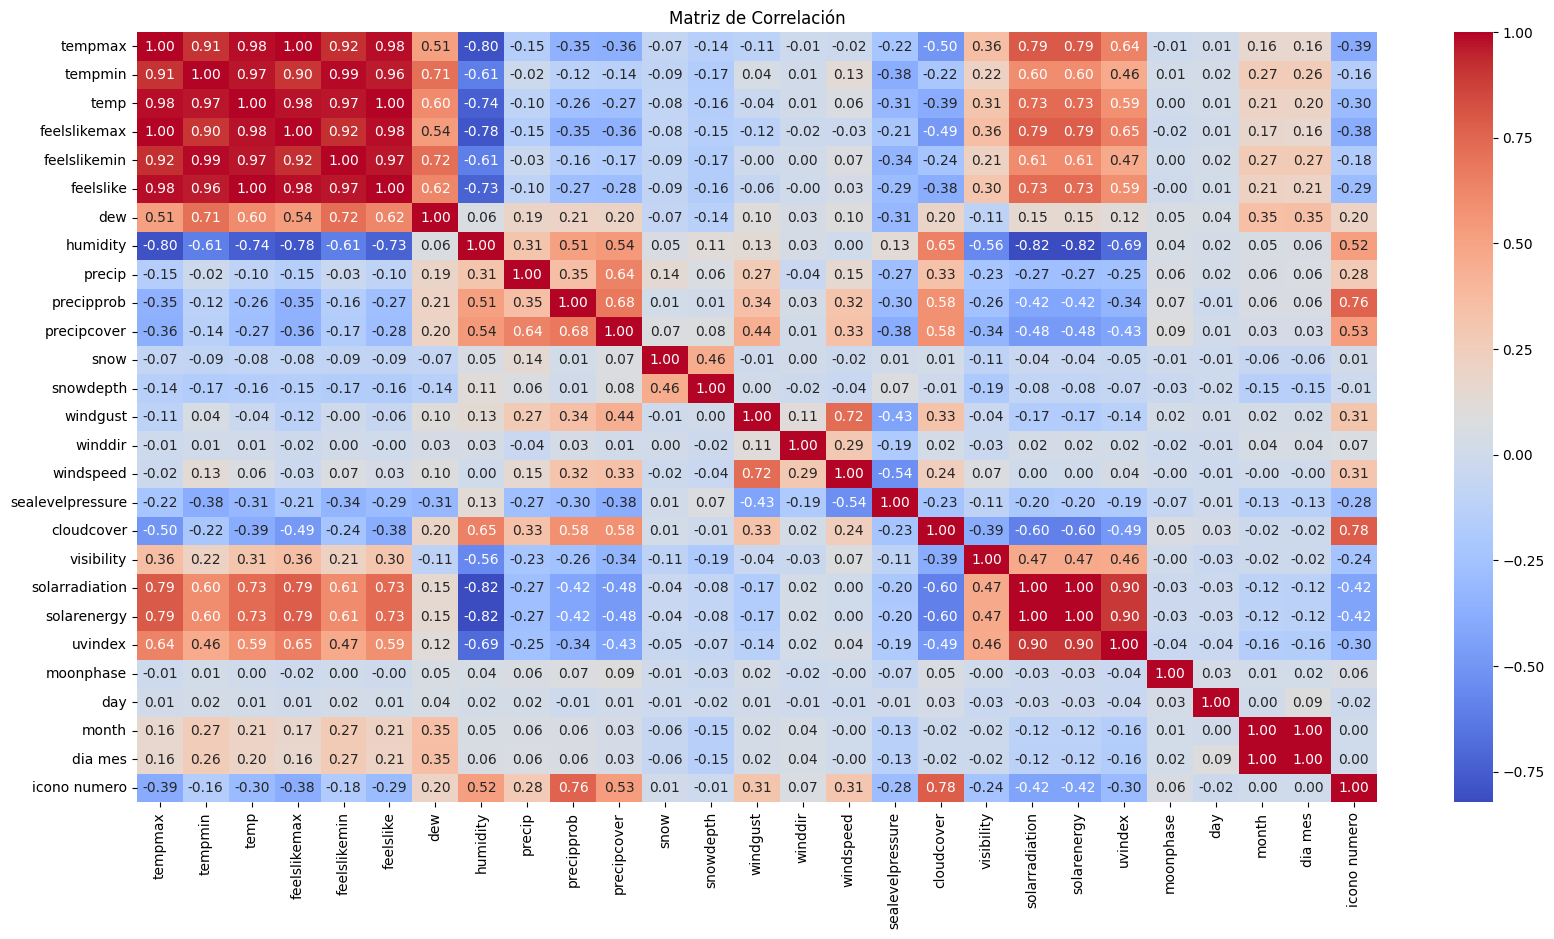

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,day,month,dia mes,icono numero
tempmax,1.000000,0.908133,0.980914,0.995679,0.915919,0.978981,0.514210,-0.798214,-0.153775,-0.354713,...,-0.499130,0.358258,0.788198,0.788245,0.644064,-0.013787,0.006678,0.164701,0.161740,-0.391924
tempmin,0.908133,1.000000,0.966940,0.904816,0.991821,0.962796,0.713233,-0.608382,-0.023272,-0.124609,...,-0.217347,0.223843,0.598027,0.597826,0.464134,0.013442,0.017825,0.266261,0.264098,-0.158116
temp,0.980914,0.966940,1.000000,0.975814,0.967292,0.996054,0.603231,-0.743578,-0.102360,-0.262409,...,-0.386403,0.311104,0.734124,0.734017,0.585965,0.000212,0.011832,0.205400,0.202697,-0.297123
feelslikemax,0.995679,0.904816,0.975814,1.000000,0.916454,0.979878,0.536965,-0.780423,-0.149354,-0.349597,...,-0.485056,0.356609,0.786265,0.786291,0.651531,-0.016061,0.009571,0.167476,0.164715,-0.379758
feelslikemin,0.915919,0.991821,0.967292,0.916454,1.000000,0.971496,0.720613,-0.605143,-0.034882,-0.156656,...,-0.236738,0.213664,0.605714,0.605516,0.471721,0.002486,0.021306,0.272130,0.270263,-0.181396
feelslike,0.978981,0.962796,0.996054,0.979878,0.971496,1.000000,0.624179,-0.727089,-0.102044,-0.268055,...,-0.379183,0.304562,0.732768,0.732648,0.589317,-0.004188,0.014844,0.211736,0.209249,-0.294240
dew,0.514210,0.713233,0.603231,0.536965,0.720613,0.624179,1.000000,0.061382,0.190516,0.206104,...,0.195088,-0.105314,0.152337,0.152324,0.115896,0.046596,0.041819,0.352208,0.353053,0.204007
humidity,-0.798214,-0.608382,-0.743578,-0.780423,-0.605143,-0.727089,0.061382,1.000000,0.312866,0.510525,...,0.650310,-0.560238,-0.822310,-0.822206,-0.692091,0.039865,0.022303,0.050998,0.055329,0.522863
precip,-0.153775,-0.023272,-0.102360,-0.149354,-0.034882,-0.102044,0.190516,0.312866,1.000000,0.354219,...,0.334451,-0.227170,-0.270296,-0.270720,-0.253488,0.058294,0.023838,0.059130,0.060991,0.276752
precipprob,-0.354713,-0.124609,-0.262409,-0.349597,-0.156656,-0.268055,0.206104,0.510525,0.354219,1.000000,...,0.580686,-0.256772,-0.422036,-0.422469,-0.336138,0.071881,-0.012551,0.056051,0.055157,0.764922


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import r2_score


#Cogemos todos los datos y los juntamos todos en un mismo dataframe
df = pd.read_csv("Madrid 2022-02-08 to 2024-11-01.csv")
df2 = pd.read_csv("madrid 2019-04-08 to 2022-01-01.csv")
df3 =pd.read_csv("madrid 2022-01-02 to 2022-02-07.csv")
df = pd.concat([df, df2, df3], ignore_index=True)

#Ordenamos los datos por fecha
df = df.sort_values(by='datetime', ascending=True) 
df.reset_index(drop=True, inplace=True)

#Eliminamos la columna name debido a que todos los datos son de Madrid
df.drop("name", axis=1, inplace=True)


# Convertir la columna de fecha a tipo datetime
df['datetime'] = pd.to_datetime(df['datetime'])

#Categorizar la columna icon
labelencoder=LabelEncoder()
df["icono numero"]= labelencoder.fit_transform(df["icon"])
df

#Datetime a dia
df["month"]= df["datetime"].dt.month

df["day"]= df["datetime"].dt.day
df



# Configuramos el tamaño de la figura para que se vea bien
plt.figure(figsize=(20,10))

#Transformamos 
def dia_del_mes(dia,mes):
    dias_por_mes = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

    return sum(dias_por_mes[:mes-1]) + dia

df["dia mes"] = df.apply(lambda x: dia_del_mes(x["day"], x["month"]), axis=1)

#Correlaciones
correlaciones = df[["tempmax","tempmin","temp","feelslikemax","feelslikemin","feelslike","dew","humidity","precip","precipprob","precipcover","snow","snowdepth","windgust","winddir","windspeed","sealevelpressure","cloudcover","visibility","solarradiation","solarenergy","uvindex","moonphase", "day", "month","dia mes","icono numero"]].corr()

# Creamos un mapa de calor (heatmap) con la matriz de correlación del DataFrame `df`
sns.heatmap(
    correlaciones,        # Calculamos la matriz de correlación
    annot=True,       # Mostramos los valores numéricos dentro de cada celda
    cmap='coolwarm',  # Usamos una paleta de colores que va de azul a rojo
    fmt=".2f"         # Limitamos los valores a 2 decimales
)

# Añadimos un título al gráfico
plt.title("Matriz de Correlación")

# Mostramos la gráfica generada
plt.show()

correlaciones


In [2]:
# Selección de variables predictoras (X) y objetivo (y)
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


columnas_predictoras = ["dew","humidity","precip","precipprob","precipcover","snow","snowdepth","windgust","winddir","windspeed","sealevelpressure","cloudcover","visibility","uvindex","moonphase", "day", "month"]



X = df[columnas_predictoras]
y = df["temp"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Agregar la variable objetivo nuevamente al DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled["temp"] = y

# Calcular la correlación de las variables con el precio de la vivienda
correlaciones = df_scaled.corr()["temp"].sort_values(ascending=False)

# Mostrar la correlación de cada variable con la variable objetivo
print("Correlaciones con la variable objetivo:")
print(correlaciones)



# Calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Mostrar los resultados
print("VIF de cada variable:")
print(vif_data)

"""
· VIF < 5 → No hay problema de colinealidad.
· VIF entre 5 y 10 → Hay colinealidad moderada, revisar.
· VIF > 10 → Fuerte colinealidad, se recomienda eliminar la variable.

"""

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal múltiple
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener los coeficientes
coeficientes = pd.Series(modelo.coef_, index=X.columns)

# Mostrar el intercepto y los coeficientes
print("Intercepto:", modelo.intercept_)
print("Coeficientes:")
print(coeficientes)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")



# Función para hacer predicciones con nuevos valores de BMI
def predecir_progresion(dew, humidity, precip, precipprob, precipcover, snow, snowdepth, windgust, winddir, windspeed, sealevelpressure, cloudcover, visibility, uvindex, moonphase, day, month):
    prediccion = modelo.predict([[dew, humidity, precip, precipprob, precipcover, snow, snowdepth, windgust, winddir, windspeed, sealevelpressure, cloudcover, visibility, uvindex, moonphase, day, month
]])[0]
    print(f"Predicción: Si hay datos {dew, humidity, precip, precipprob, precipcover, snow, snowdepth, windgust, winddir, windspeed, sealevelpressure, cloudcover, visibility, uvindex, moonphase, day, month} la  temperatura sera {prediccion}.")

predecir_progresion(-0.3,49.7,0,0,0,0,0,24.8,33.1,11.6,1029.6,0.8,18.1,6,0.25,8,2)





Correlaciones con la variable objetivo:
temp                1.000000
dew                 0.603231
uvindex             0.585965
visibility          0.311104
month               0.205400
windspeed           0.062199
day                 0.011832
winddir             0.006284
moonphase           0.000212
windgust           -0.035314
snow               -0.080605
precip             -0.102360
snowdepth          -0.157730
precipprob         -0.262409
precipcover        -0.269819
sealevelpressure   -0.313160
cloudcover         -0.386403
humidity           -0.743578
Name: temp, dtype: float64
VIF de cada variable:
            Variable       VIF
0                dew  1.495335
1           humidity  3.443926
2             precip  1.813465
3         precipprob  2.236755
4        precipcover  3.747559
5               snow  1.295591
6          snowdepth  1.365667
7           windgust  2.413179
8            winddir  1.168688
9          windspeed  2.764808
10  sealevelpressure  2.176043
11        cloudco

c:\Users\ia\Desktop\TrabajoTemperatura\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
